In [1]:
%matplotlib inline
import pandas as pd
import json

In [2]:
#File locations
acs_file = "/home/russ/Documents/DDL/Data/JeffData/PCA/Jeff_data_acs5yr.csv"
zillow_HVI_file = "/home/russ/Documents/DDL/Data/JeffData/PCA/Zip_Zhvi_AllHomes_HomeValueIndex.csv"
FDIC_deposits_100K_file = "/home/russ/Documents/DDL/Data/JeffData/PCA/FDIC_All_Reports_20150630/All_Reports_20150630_Deposits Based on the $100,000 Reporting Threshold.csv"
FDIC_deposits_250K_file = "/home/russ/Documents/DDL/Data/JeffData/PCA/FDIC_All_Reports_20150630/All_Reports_20150630_Deposits Based on the $250,000 Reporting Threshold.csv"
library_file = "/home/russ/Documents/DDL/Data/JeffData/PCA/Public_Libraries_Survey_FY_2013_-_Outlet.csv"
complaints_file = "/home/russ/Documents/DDL/Data/JeffData/PCA/Consumer_Complaints.csv"

In [3]:
acs = pd.read_csv(acs_file)

In [4]:
acs.head()

,zip5,pop,race_white,race_black,race_indian,race_asian,race_pac_is,race_other,race_multi,hisp,...,marital_yes30to34,marital_yes35to39,marital_yes40to44,marital_yes45to49,marital_yes50to54,marital_yes55to59,marital_yes60to64,marital_yes65to74,marital_yes75to84,marital_yes85p
0,601,18450,0.946179,0.007805,0.000217,0.000000,0,0.042005,0.007588,0.994580,...,0.038743,0.030818,0.049919,0.051477,0.053644,0.038607,0.049038,0.068274,0.029193,0.005690
1,602,41302,0.635611,0.035010,0.000654,0.001719,0,0.030676,0.592659,0.935838,...,0.039094,0.037999,0.051465,0.049600,0.058420,0.054276,0.053892,0.067683,0.025244,0.002545
2,603,53683,0.775217,0.032953,0.000335,0.008345,0,0.030643,0.305013,0.958609,...,0.037783,0.037464,0.033750,0.039014,0.042386,0.046215,0.056538,0.077891,0.031152,0.003168
3,606,6591,0.953421,0.011227,0.000000,0.000000,0,0.022151,0.026400,0.998635,...,0.004145,0.024496,0.032410,0.029772,0.049934,0.034483,0.061428,0.052007,0.012436,0.003580
4,610,28963,0.740013,0.029141,0.000000,0.000725,0,0.167041,0.126161,0.992542,...,0.032814,0.031205,0.067025,0.049411,0.052079,0.041282,0.048353,0.078161,0.026590,0.006563


In [60]:
zillow = pd.read_csv(zillow_HVI_file)

In [61]:
zillow = zillow[['RegionName','1996-07','1997-01','1997-07','1998-01','1998-07','1999-01','1999-07','2000-01','2000-07'\
    ,'2001-01','2001-07','2002-01','2002-07','2003-01','2003-07','2004-01','2004-07','2005-01','2005-07','2006-01','2006-07'\
    ,'2007-01','2007-07','2008-01','2008-07','2009-01','2009-07','2010-01','2010-07','2011-01','2011-07','2012-01','2012-07'\
    ,'2013-01','2013-07','2014-01','2014-07','2015-01','2015-07']]

In [62]:
zillow.rename(columns={'RegionName':'zip5'},inplace=True)
zillow.head()

,zip5,1996-07,1997-01,1997-07,1998-01,1998-07,1999-01,1999-07,2000-01,2000-07,...,2011-01,2011-07,2012-01,2012-07,2013-01,2013-07,2014-01,2014-07,2015-01,2015-07
0,10025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,758600,751200,737500,772400,825700,908100,998300,1001700,1029600,1097100
1,60657,141900,144600,154500,161400,165300,179000,188700,201900,220300,...,288300,274600,258900,264000,267900,279900,294700,297000,304500,307000
2,60614,193200,197200,199200,200800,216500,228400,244900,261900,276700,...,351800,348500,332900,332900,335700,354000,386800,382300,378900,393000
3,79936,71100,72600,74000,76000,76200,75600,77100,78400,78900,...,110100,109200,108700,109000,109900,111300,109600,111900,111600,112100
4,10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,704800,688900,696000,700000,730300,791900,849400,863900,903200,951600


In [8]:
deposits_250K = pd.read_csv(FDIC_deposits_250K_file)

In [9]:
#deposits_250K = deposits_250K[['zip'],['IDdepsmb'],['DEPSMRA'],['DEPSMRN'],['NTRCDSMJ'],['IDdeplam'],['IDdeplgb'],['DEPLGRA'],['DEPLGRN'],['NTRTMLGJ']]
deposits_250K = deposits_250K[['zip','IDdepsam','IDdepsmb','DEPSMRA','DEPSMRN','NTRCDSMJ','IDdeplam','IDdeplgb','DEPLGRA','DEPLGRN','NTRTMLGJ']]

In [10]:
deposits_250K.columns = ['zip5','dep_amt_low','dep_count_low','retirement_amt_low','retirement_count_low','time_deposits_low','dep_amt_high','dep_count_high','retirement_amt_high','retirement_count_high','time_deposits_high']

In [11]:
deposits_250K.head()

,zip5,dep_amt_low,dep_count_low,retirement_amt_low,retirement_count_low,time_deposits_low,dep_amt_high,dep_count_high,retirement_amt_high,retirement_count_high,time_deposits_high
0,21613,105111,9871,11265,712,40000,49156,70,781,2,13062
1,21202,0,0,0,0,0,500,1,0,0,500
2,63376,42888,1250,1552,84,28590,21793,32,0,0,4088
3,59317,30205,2340,743,57,7043,11090,30,0,0,0
4,74728,82686,8762,6146,208,26712,28517,37,360,1,1787


In [12]:
deposits_zip = deposits_250K['dep_amt_high'].groupby(deposits_250K['zip5']).mean().reset_index()

In [13]:
deposits_zip.head()

,zip5,dep_amt_high
0,802,67941
1,820,36914
2,909,2542958
3,917,2690626
4,918,1567600


In [14]:
library = pd.read_csv(library_file)

In [14]:
#Slice field value based on hard coded State
#Next step to substitute ['STABR'] for State text to dynamically find location of each state within address field
#library_zip.apply(lambda x : x['Location'][0:15], axis =1)
#library_zip.apply(lambda x : x['Location'][x['Location'].find(', AK')+5:x['Location'].find(', AK')+10], axis =1)
#Strip Zip Code From Location Column
#library_zip = library[['Location','STABR']]
#library_zip['zip'] = library_zip.apply(lambda x : x['Location'][x['Location'].find(', ' + x['STABR'])+5:x['Location'].find(', ' + x['STABR'])+10], axis =1)

In [15]:
#Parse out Zip Code from Location field
library['zip'] = library.apply(lambda x : x['Location'][x['Location'].rfind(', ' + x['STABR'])+5:x['Location'].rfind(', ' + x['STABR'])+10], axis =1)

In [16]:
library.head(2)

,STABR,FSCSKEY,FSCS_SEQ,LIBID,LIBNAME,CNTY,PHONE,C_OUT_TY,C_MSA,SQ_FEET,...,CENTRACT,CENBLOCK,CDCODE,CBSA,MICROF,GAL,GALMS,POSTMS,Location,zip
0,AK,AK0001,2,AK0001-002,ANCHOR POINT PUBLIC LIBRARY,KENAI PENINSULA,9072355692,CE,NO,1287,...,8.00,3014,200,0,0,house,STD,NND,"72551 MILO FRITZ AVENUE\nANCHOR POINT, AK 9955...",99556
1,AK,AK0002,7,AK0002-007,CHUGIAK/EAGLE RIVER NEIGHBORHOOD LIBRARY,ANCHORAGE,9073431530,BR,CC,17888,...,2.01,2021,200,11260,0,addresspoint,STD,NND,"12001 BUSINESS BOULEVARD #176\nEAGLE RIVER, AK...",99577


In [9]:
#Change to your local path
library.to_csv("/home/russ/Documents/DDL/Data/JeffData/PCA/Library_ZipCode.csv")

In [17]:
library_zip = library['STABR'].groupby(library['zip']).count().reset_index()

In [18]:
library_zip['zip5'] = library_zip.apply(lambda x: int(x['zip']),axis=1)

In [19]:
library_zip.columns = ['zip','LibraryCount','zip5']

In [20]:
library_zip.head(10)

,zip,LibraryCount,zip5
0,00602,1,602
1,00603,1,603
2,00605,1,605
3,00610,1,610
4,00612,1,612
5,00613,2,613
6,00617,2,617
7,00624,1,624
8,00627,4,627
9,00638,1,638


In [63]:
combined = pd.merge(acs[['zip5','snap','inc_median','poverty']],zillow[['zip5','2015-07']], on='zip5',copy=False)

In [64]:
combined.head()

,zip5,snap,inc_median,poverty,2015-07
0,1001,0.089002,58733,0.071132,180800
1,1002,0.086397,54422,0.392859,306400
2,1005,0.029427,68644,0.037358,188900
3,1007,0.088479,71875,0.090516,254300
4,1008,0.043956,71635,0.013986,218600


In [65]:
combined[combined['zip5']==90210]

,zip5,snap,inc_median,poverty,2015-07
11183,90210,0.008544,132254,0.077309,4635700


In [66]:
#Beginning PCA Analysis (reference: http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)

X = combined.ix[:,1:5].values
y = combined.ix[:,0].values

In [67]:
#Standardization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [68]:
X_std

array([[-0.23503473, -0.09204204, -0.49427454, -0.26963345],
       [-0.26560554, -0.26560066,  2.92775955,  0.26227518],
       [-0.93412112,  0.30696967, -0.85351083, -0.23533043],
       ..., 
       [-0.98195932,  0.9688758 , -0.92370737, -0.05068699],
       [-0.31585168,  0.88465296, -0.70153587,  0.33553967],
       [ 0.31176179,  0.06038035, -0.28919535, -0.0350177 ]])

In [69]:
#Same PCA analysis using scikit-learn

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [70]:
Y_sklearn

array([[-0.20961048,  0.55531939],
       [ 1.32597703, -1.68874645],
       [-0.99892206,  0.83740701],
       ..., 
       [-1.49940979,  0.63459819],
       [-1.13784378,  0.05522838],
       [ 0.00880996,  0.09525603]])

In [71]:
df = pd.DataFrame({'X':Y_sklearn[:,0],'Y':Y_sklearn[:,1]})

In [72]:
df = combined[['zip5']].merge(df,left_index=True, right_index=True)

In [73]:
df[df['zip5']==90210]

,zip5,X,Y
11183,90210,-9.901957,-14.466638


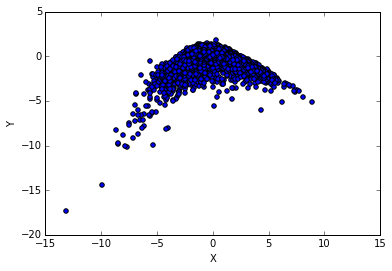

In [74]:
#Top of arc = High Housing, low Income
#Negative = High Housing, High Income
#Positive = Low Housing, Low Income
df.plot(kind='scatter',x='X',y='Y')

In [77]:
df[df['Y']<-10]

,zip5,X,Y
5201,33109,-7.667834,-10.175178
11183,90210,-9.901957,-14.466638
11220,90402,-7.893375,-10.070110
11866,94027,-13.161680,-17.342531


In [79]:
df[df['X']>8]

,zip5,X,Y
6183,37915,8.058904,-4.534861
6952,45232,8.904873,-5.158492


In [94]:
df[(df['X']>-.5) & (df['X']<.5) & (df['Y']<0)]

,zip5,X,Y
21,1053,0.064608,-0.245104
62,1240,-0.257232,-0.021684
63,1245,-0.279738,-0.975474
69,1262,-0.353235,-0.176648
90,1375,0.306770,-0.183014
104,1464,-0.307914,-0.007825
119,1518,-0.037178,-0.082075
132,1537,0.226301,-0.377547
163,1702,0.364843,-0.195228
241,1970,0.435376,-0.476600


In [80]:
df[df['Y']>0]

,zip5,X,Y
0,1001,-0.209610,0.555319
2,1005,-0.998922,0.837407
3,1007,-0.529983,0.114181
4,1008,-1.144768,0.811163
5,1010,-0.971439,0.569256
6,1011,-0.341337,0.577316
8,1020,0.309196,0.520136
10,1026,-0.552681,0.720066
11,1027,-0.514904,0.554378
12,1028,-0.983329,0.449181


In [84]:
combined[combined['zip5']== 28202]

,zip5,snap,inc_median,poverty,2015-07
4126,28202,0.101994,70300,0.102324,247900


In [83]:
combined[combined['zip5']== 43240]

,zip5,snap,inc_median,poverty,2015-07
6548,43240,0.057207,65236,0.006457,164900


In [82]:
combined[combined['zip5']== 90210]

,zip5,snap,inc_median,poverty,2015-07
11183,90210,0.008544,132254,0.077309,4635700


In [81]:
combined[combined['zip5']== 99901]

,zip5,snap,inc_median,poverty,2015-07
12978,99901,0.1356,62519,0.090413,236200


In [100]:
combined[combined['zip5']== 58420]

,zip5,snap,inc_median,poverty,2015-07


In [85]:
df[df['zip5']== 90210]

,zip5,X,Y
11183,90210,-9.901957,-14.466638


In [37]:
traces = []

list = combined['zip5'].values.tolist()
list_short = list[0:200]
list_short.append('90210')

for name in (list_short):

    trace = Scatter(
        x=Y_sklearn[y==name,0],
        y=Y_sklearn[y==name,1],
        mode='markers',
        name=name,
        marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))
    traces.append(trace)


data = Data(traces)
layout = Layout(xaxis=XAxis(title='PC1', showline=False),
                yaxis=YAxis(title='PC2', showline=False))
fig = Figure(data=data, layout=layout)
py.iplot(fig)